In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
def mase(y_true, y_pred, y_train):
    """
    Calculate MASE (Mean Absolute Scaled Error).
    y_true: Actual values
    y_pred: Predicted values
    y_train: Training data (used to calculate naive forecast errors)
    """
    # Calculate MAE of the forecast
    mae_forecast = np.mean(np.abs(y_true - y_pred))
    
    # Calculate MAE of the naive forecast (shifted by one time step)
    mae_naive = np.mean(np.abs(y_train[1:] - y_train[:-1]))
    if (mae_naive == 0):
        print("Danger")
    
    # Calculate MASE
    mase_value = mae_forecast / mae_naive
    return mase_value

In [3]:
df = pd.read_csv("parkingLot.csv")
temp_variable = df.groupby("vehicle_no").size().reset_index()
temp_variable = temp_variable[temp_variable[0] == 1]
temp_variable

def differs_by_one_char(str1, str2):
    # If lengths are different, return False as they can't be approximate matches
    if str1 == "":
        print("danger")
    if len(str1) != len(str2):
        return False
    # Count the number of differing characters
    diff_count = sum(1 for a, b in zip(str1, str2) if a != b)
    # Return True if they differ by exactly one character
    return diff_count == 1

def find_unique_strings(strings):
    strings = list(strings)
    unique_strings = []
    for i, string in enumerate(strings):
        if strings.count(string) % 2 == 0:
            continue
        # Flag to check if the string has an approximate match
        has_approximate_match = False
        number = 0
        for j, other_string in enumerate(strings):
            if string == other_string:
                number += 1
            if i != j and differs_by_one_char(string, other_string):
                has_approximate_match = True
                
        # If no approximate match found, add the string to the result
        if not has_approximate_match and number <= 1:
            unique_strings.append(string)
    return unique_strings

# Example usage
strings = temp_variable["vehicle_no"]
print(len(strings))
unique_strings = find_unique_strings(strings)
print("Strings without approximate matches:", unique_strings)


1462
Strings without approximate matches: ['M7NO9764', 'MH4S0891', 'MHAF4661', 'MHAH3974', 'MHAO5621', 'MHAO6348', 'MHAT4088', 'MHAT7886', 'MHAV1489', 'MHAV5142', 'MHAW5696', 'MHBA0183', 'MHBA5766', 'MHBA8763', 'MHBB1404', 'MHBD0872', 'MHBD7416', 'MHBE9673', 'MHBF2131', 'MHBH1487', 'MHBI8397', 'MHBJ7823', 'MHBK01E8', 'MHBM0342', 'MHBM2888', 'MHBO4205', 'MHBT1133', 'MHBU0814', 'MHBU5467', 'MHBU8023', 'MHBX3344', 'MHBX5558', 'MHBZ0281', 'MHCB1274', 'MHCC8760', 'MHCD0429', 'MHCD0524', 'MHCE0253', 'MHCF1020', 'MHCF2082', 'MHCF2742', 'MHCO0339', 'MHCO7106', 'MHCS7798', 'MHCW1579', 'MHCW7984', 'MHCX7514', 'MHCZ3445', 'MHDB6288', 'MHDB7308', 'MHDC6371', 'MHDE6657', 'MHDG5210', 'MHDI0209', 'MHDI0328', 'MHDI4186', 'MHDJ0261', 'MHDM2738', 'MHDN9310', 'MHDO3183', 'MHDR4634', 'MHDT7185', 'MHDW7736', 'MHDX8289', 'MHEA6428', 'MHEE8173', 'MHEJ1855', 'MHEN4883', 'MHEO2336', 'MHEP9996', 'MHEV2277', 'MHEV5498', 'MHEV9677', 'MHEW6419', 'MHEX2269', 'MHEX5551', 'MHEZ0666', 'MHFD1443', 'MHFE9573', 'MHFI3557

In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["date"] = df["timestamp"].dt.date
dates = df.groupby(["date"]).agg(list)
dates_camera = df.groupby(["date","camera_id"]).agg(list)
specific_date = datetime.strptime('2024-10-01', '%Y-%m-%d').date()

result = dates.loc[(specific_date)]["vehicle_no"]
unique_strings = find_unique_strings(result)


In [5]:
start_date='2024-09-12'
end_date = '2024-11-13'
import math
all_dates = pd.date_range(start = start_date, end = end_date)

time_series_of_vehicles_entered = []

for i in all_dates:
    specific_date = i.date()
    result_local = dates.loc[specific_date]["vehicle_no"]
    # print(result_local)
    nan_count = 0
    # result_local = [x for x in result_local if not pd.isna(x) else nan_count += 1]
    result_local_new = []
    for x in result_local:
        if not pd.isna(x):
            result_local_new.append(x)
        else:
            nan_count += 1
    result_local = result_local_new
    unique_strings = find_unique_strings(result_local)
    time_series_of_vehicles_entered.append((len(result_local) + len(unique_strings) + nan_count) / 2)

print(time_series_of_vehicles_entered)

[886.0, 827.0, 978.5, 1092.5, 883.0, 826.5, 963.0, 918.5, 809.0, 965.5, 870.0, 850.0, 848.0, 754.5, 774.5, 811.5, 867.5, 928.5, 818.5, 753.0, 1011.0, 863.0, 835.5, 850.0, 876.5, 884.0, 768.5, 883.0, 842.0, 826.0, 896.0, 1017.0, 877.0, 849.5, 912.0, 811.0, 844.0, 805.0, 826.0, 887.0, 873.5, 875.0, 868.0, 817.0, 845.0, 856.0, 853.0, 893.0, 887.0, 763.0, 926.5, 908.0, 868.5, 911.5, 897.0, 915.5, 829.0, 825.5, 951.5, 963.5, 845.0, 823.0, 797.0]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66926D+00    |proj g|=  1.95211D+00

At iterate    5    f=  5.67980D+00    |proj g|=  4.51920D-02

At iterate   10    f=  5.66341D+00    |proj g|=  6.73294D-03

At iterate   15    f=  5.65794D+00    |proj g|=  9.46106D-03

At iterate   20    f=  5.65213D+00    |proj g|=  2.46491D-04


/Users/kamyak/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   25    f=  5.65169D+00    |proj g|=  2.04463D-03

At iterate   30    f=  5.65121D+00    |proj g|=  7.79344D-04

At iterate   35    f=  5.65024D+00    |proj g|=  1.41225D-03

At iterate   40    f=  5.65006D+00    |proj g|=  3.31324D-04

At iterate   45    f=  5.64999D+00    |proj g|=  1.86744D-04

At iterate   50    f=  5.64997D+00    |proj g|=  8.97620D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     54      1     0     0   8.976D-05   5.650D+00
  F =   5.6499696160565609     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Result

/Users/kamyak/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


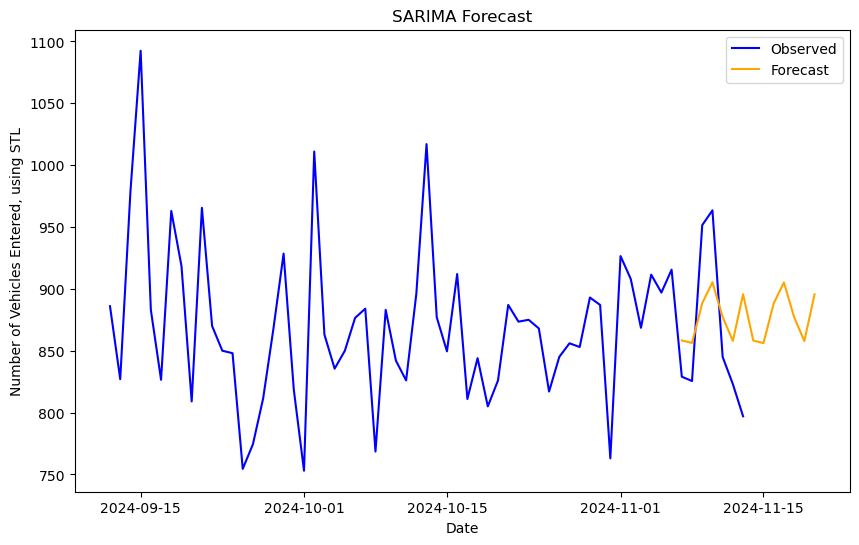

In [6]:
vehicles_entered = pd.Series(time_series_of_vehicles_entered)
vehicles_entered.index = all_dates

model = SARIMAX(vehicles_entered.values[:-7], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))
results = model.fit()

# Step 3: Summary of the model
print(results.summary())

# Step 4: Forecasting
forecast = results.get_forecast(steps=14)
forecast_index = pd.date_range(start=vehicles_entered.index[-7], periods=14, freq='D')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

MASE_sarima_stl_entry = mase(vehicles_entered.values[-7:], forecast_values[-14:-7], vehicles_entered.values[:-7])
MSE_sarima_stl_entry = mean_squared_error(vehicles_entered.values[-7:], forecast_values[-14:-7])

# print("------------ Forecasting Vehicles entered on the next 7 days after outlier smoothing using rolling ---------\n\n\n")

print("ARIMA Forecast for next 7 days:\n", forecast_values[-7:], sep="")
print("\nMean absolute scaled error is: ", MASE_sarima_stl_entry)

MAPE_sarima_stl_entry = mean_absolute_percentage_error(vehicles_entered[-7:],forecast_values[-14:-7]) * 100
print("Mean absolute percentage error is: ", MAPE_sarima_stl_entry)

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(vehicles_entered.index, vehicles_entered.values, label='Observed', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
# plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3)
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles Entered, using STL')
plt.legend()
plt.show()
